# General Conclusions

**1.** The average revenue per user (ARPU) in test group B was 5% higher than in control group A.  
However, the results of statistical tests — the t-test (p ≈ 0.53) and bootstrap analysis (p ≈ 0.269, 95% CI: [-2.97, 5.45]) — do not confirm the significance of this difference.  
The application of the t-test is justified due to the large sample sizes (more than 200,000 users in each group), which allows the use of the Central Limit Theorem despite the non-normal distribution.  

**2.** The conversion rate (CR) to paying users is statistically significantly higher in control group A:  
0.95% versus 0.89% in group B (z-test, p ≈ 0.035).  
This indicates that offer A is more effective in encouraging users to make their first payment.  

**3.** The average revenue per paying user (ARPPU) is higher in test group B — 3004 compared to 2664 in control group A.  
However, the conducted t-test (p ≈ 0.1002) did not show a statistically significant difference.  
This means that the difference between groups could have arisen by chance and cannot be considered a stable test result.  

**4.** To assess potential revenue stability, ARPU variances were analyzed.  
Although the standard deviation of revenue in group B is lower (287 versus 920 in group A), the Levene’s test (p ≈ 0.53) did not reveal a statistically significant difference in variances between the groups.  
Therefore, the assumption of higher stability or predictability of revenue in group B is not formally supported.  

**5.** Taken together, the data show that group A is more effective at converting users into payers, while group B demonstrates higher revenue per paying user — but without statistical confidence in ARPU growth or stability of metrics.  


## Recommendations for Analysis

- Do not roll out the offer from group B on a large scale, as it does not provide a stable and statistically significant increase in key metrics.

- Conduct additional analysis of paying users in group B (retention, LTV, segmentation).

- Consider a hybrid approach: use the structure of offer A for user engagement, while adopting monetization elements from B to increase revenue in certain segments.

- Explore the potential of personalization: identify user groups for which offer B may be the most relevant.


In [6]:
import gdown
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import levene

In [8]:
file_id = "1YQSOVz5XntlFXPt8t5AtU9wolmDmhj4P"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

gdown.download(url, "Project_1.csv", quiet=False)

test = pd.read_csv("Project_1.csv", sep=";")

Downloading...
From: https://drive.google.com/uc?export=download&id=1YQSOVz5XntlFXPt8t5AtU9wolmDmhj4P
To: /Users/pashaborisiuk/Desktop/Analytic/final/Project_1.csv
100%|██████████| 4.35M/4.35M [00:00<00:00, 12.8MB/s]


In [9]:
test.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [10]:
test.revenue.max()

np.int64(37433)

In [11]:
test.query('revenue == 37433')

,user_id,revenue,testgroup
101861,101862,37433,a


In [12]:
# Number of customers in each group
clients_amount = test.groupby('testgroup', as_index=False).agg({'revenue': 'count'})
print(clients_amount)

  testgroup  revenue
0         a   202103
1         b   202667


In [13]:
# Total revenue from each group
total_revenue = test.groupby('testgroup', as_index=False).agg({'revenue': 'sum'})
print(total_revenue)

  testgroup  revenue
0         a  5136189
1         b  5421603


In [14]:
# Average revenue per user (ARPU) for each group
test.groupby('testgroup', as_index=False).agg({'revenue': 'mean'}).round(2)

,testgroup,revenue
0,a,25.41
1,b,26.75


In [15]:
# Number of payments in each group
payment_count = test.query('revenue > 0').groupby('testgroup', as_index=False).agg({'revenue': 'count'})
print(payment_count)

  testgroup  revenue
0         a     1928
1         b     1805


In [16]:
# Conversion Rate
CR = round(payment_count.revenue / clients_amount.revenue * 100, 2)
print(CR)

0    0.95
1    0.89
Name: revenue, dtype: float64


In [17]:
# Average Revenue Per Paying User (ARPPU)
ARPPU = round(total_revenue.revenue / payment_count.revenue, 0)
print(ARPPU)

0    2664.0
1    3004.0
Name: revenue, dtype: float64


In [18]:
# ARPPU ratio between groups
round((ARPPU[1] - ARPPU[0]) / ARPPU[0] * 100, 1)

np.float64(12.8)

In [20]:
# ARPU data (all users, including non-paying)
arpu_a = test[test['testgroup'] == 'a']['revenue']  # test group
arpu_b = test[test['testgroup'] == 'b']['revenue']  # control group

In [21]:
# Conducting a t-test
t_stat, p_value = ttest_ind(arpu_a, arpu_b, equal_var=False)
print(f"t = {t_stat}, p = {p_value}")

t = -0.6234876562792211, p = 0.5329647014130874


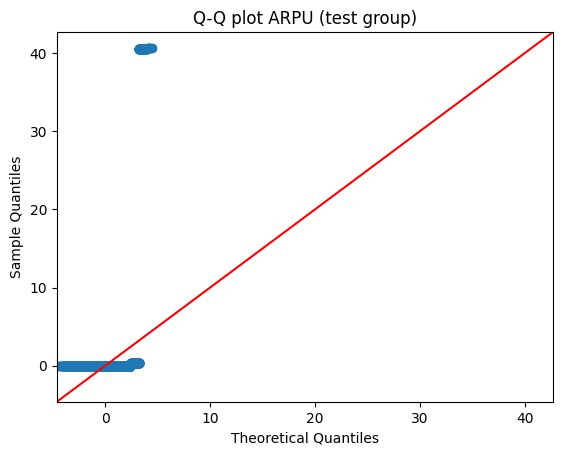

In [22]:
# Q-Q plot for the test group  
# Check whether the distribution is normal
sm.qqplot(arpu_a, line='45', fit=True)
plt.title('Q-Q plot ARPU (test group)')
plt.show()

In [23]:
# Conduct Levene's test for equality of ARPU variances between groups
levene_stat, levene_p = levene(arpu_a, arpu_b)
print(f"p-value Levene test: {levene_p}")

p-value Levene test: 0.5324948591043842


In [24]:
arppu_a = test[(test['testgroup'] == 'a') & (test['revenue'] > 0)]['revenue']
arppu_b = test[(test['testgroup'] == 'b') & (test['revenue'] > 0)]['revenue']

In [25]:
# Conduct Levene's test for equality of ARPU variances between groups
stat, p_value = ttest_ind(arppu_a, arppu_b, equal_var=False)
print(f"t-test ARPPU: p-value = {p_value:.4f}")

t-test ARPPU: p-value = 0.1002


In [26]:
# Control group (B)
payers_b = 1928
total_b = 202103

In [27]:
# Test group (A)
payers_a = 1805
total_a = 202667

In [28]:
counts = [payers_a, payers_b]  # number of paying users
nobs = [total_a, total_b]       # total number of users

In [29]:
# Significance test for conversion difference (z-test)  
# Conversion is the share of paying users, so we use a z-test for proportions
z_stat, p_value = proportions_ztest(counts, nobs, alternative='two-sided')
print(f"p-value for conversion {p_value:.4f}")

p-value for conversion 0.0350


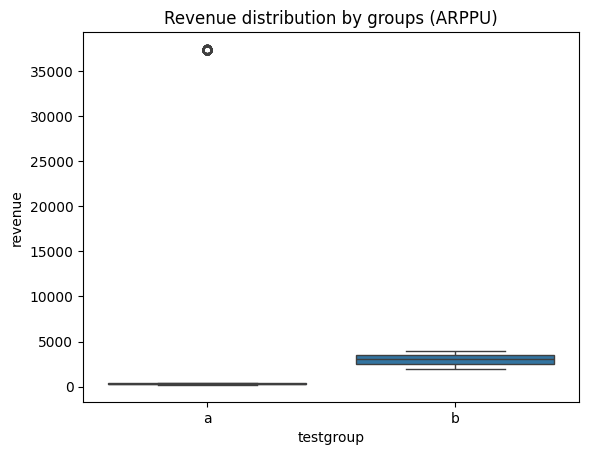

In [30]:
# Check for outliers in payments using a plot

sns.boxplot(x='testgroup', y='revenue', data=test[test['revenue'] > 0])  # Only paying users
plt.title('Revenue distribution by groups (ARPPU)')
plt.show()

In [31]:
# Analyze outliers
print(arpu_a.describe(percentiles=[.9, .95, .99]))
print(arpu_b.describe(percentiles=[.9, .95, .99]))

count    202103.000000
mean         25.413720
std         920.768137
min           0.000000
50%           0.000000
90%           0.000000
95%           0.000000
99%           0.000000
max       37433.000000
Name: revenue, dtype: float64
count    202667.000000
mean         26.751287
std         287.324162
min           0.000000
50%           0.000000
90%           0.000000
95%           0.000000
99%           0.000000
max        4000.000000
Name: revenue, dtype: float64


95% CI: [-2.97, 5.45]
p-value (bootstrap): 0.2690


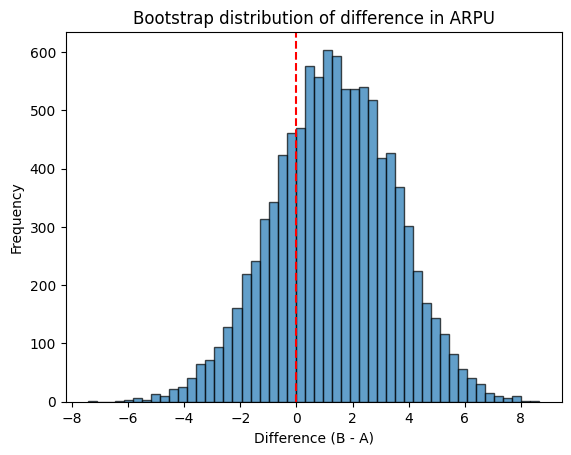

In [32]:
# Bootstrap analysis of ARPU

# Parameters
n_iterations = 10000
np.random.seed(42)

# Bootstrap of mean differences
boot_diffs = []

for _ in range(n_iterations):
    sample_a = np.random.choice(arpu_a, size=len(arpu_a), replace=True)
    sample_b = np.random.choice(arpu_b, size=len(arpu_b), replace=True)
    
    diff = sample_b.mean() - sample_a.mean()
    boot_diffs.append(diff)

boot_diffs = np.array(boot_diffs)

# Confidence interval
ci_lower = np.percentile(boot_diffs, 2.5)
ci_upper = np.percentile(boot_diffs, 97.5)

# P-value (proportion of samples where diff <= 0)
p_value = np.mean(boot_diffs <= 0)

# Output
print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"p-value (bootstrap): {p_value:.4f}")

# Visualization
plt.hist(boot_diffs, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.title("Bootstrap distribution of difference in ARPU")
plt.xlabel("Difference (B - A)")
plt.ylabel("Frequency")
plt.show()